In [1]:
# A2Q3
# All of the code is independently developed by Shao Shi

In [2]:
# read csv file 
# make some missing values to NaN
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import hexbin

raw = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                  usecols=range(17),
                  skiprows=[1],
                  parse_dates=['ISO_TIME'],
                  na_values={'NAME': 'NOT_NAMED', 'WMO_WIND': ' '})

C:\Users\MSI\AppData\Local\Temp\ipykernel_9020\2016688619.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


In [3]:
# 1
# choose values that were named
named = raw[raw['NAME'].notna()]
# Group them into SID groups
groupSID = named.groupby(['SID'], dropna=True)
print(groupSID[['WMO_WIND','NAME']].max().sort_values(by ='WMO_WIND', ascending=False)['NAME'].head(10))

SID
2015293N13266    PATRICIA
1980214N11330       ALLEN
1988253N12306     GILBERT
2005289N18282       WILMA
1997253N12255       LINDA
2019236N10314      DORIAN
2009288N07267        RICK
2017242N16333        IRMA
2005261N21290        RITA
1998295N12284       MITCH
Name: NAME, dtype: object


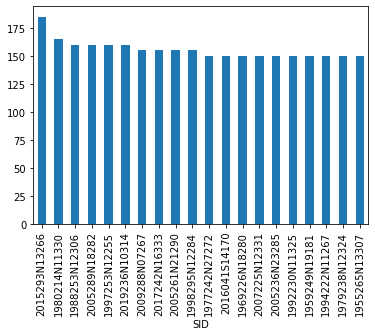

In [4]:
# 2 (should run # 1 first)
groupSID['WMO_WIND'].max().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

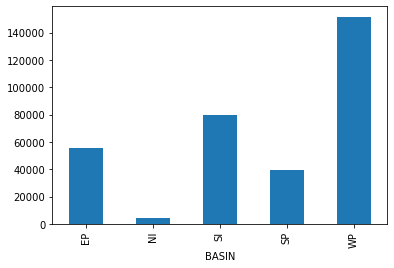

In [5]:
# 3
groupBasin = named.groupby(['BASIN'], dropna=True)
groupBasin.size().plot(kind='bar')
plt.show()

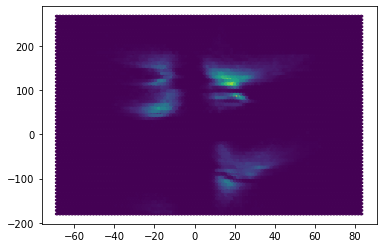

In [6]:
# 4
hexbin(raw['LAT'], raw['LON'])
plt.show()

<AxesSubplot:xlabel='LAT', ylabel='LON'>

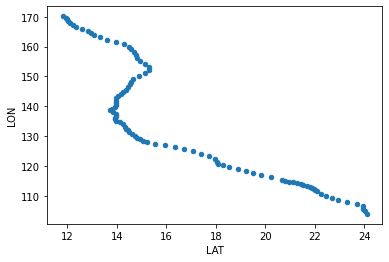

In [7]:
# 5
typhoonMangkhut = named.loc[named['NAME'] == 'MANGKHUT'].set_index("ISO_TIME")
typhoonMangkhut.loc['2018'].plot.scatter(x='LAT', y='LON')

In [16]:
# 6
# filter the data required and then creat some columns for future usage
selectedBasin = raw.loc[(raw['BASIN'] == 'WP') | (raw['BASIN'] == 'EP')]
selectedBasin["YEAR"] = selectedBasin["ISO_TIME"].apply(lambda x: x.year)
selectedBasin["MD"] = selectedBasin["ISO_TIME"].apply(lambda x: x.strftime("%m-%d"))
selectedBasin["YMD"] = selectedBasin["ISO_TIME"].apply(lambda x: x.strftime("%Y-%m-%d"))
selectedBasinYear = selectedBasin.loc[selectedBasin["YEAR"] >= 1970]

C:\Users\MSI\AppData\Local\Temp\ipykernel_9020\1447849907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedBasin["YEAR"] = selectedBasin["ISO_TIME"].apply(lambda x: x.year)
C:\Users\MSI\AppData\Local\Temp\ipykernel_9020\1447849907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedBasin["MD"] = selectedBasin["ISO_TIME"].apply(lambda x: x.strftime("%m-%d"))
C:\Users\MSI\AppData\Local\Temp\ipykernel_9020\1447849907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

YMD
1970-02-19    8
1970-02-20    8
1970-02-21    8
1970-02-22    8
1970-02-23    8
             ..
2022-10-04    9
2022-10-05    7
2022-10-09    1
2022-10-10    7
2022-10-12    3
Length: 10817, dtype: int64


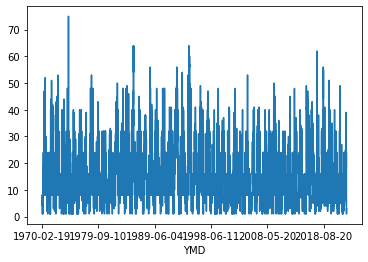

In [9]:
# 7
groupByYMD = selectedBasinYear.groupby(by="YMD")
print(groupByYMD.size())
(groupByYMD.size()).plot()
plt.show()

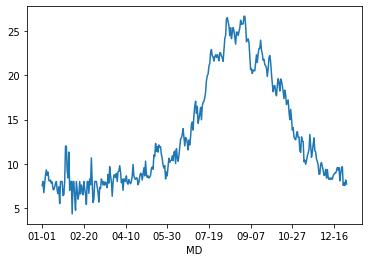

In [18]:
# 8
# Group data by month-day information
groupByMD = selectedBasinYear.groupby(by="MD")
# Creat a list to store the number of days in the history
dayCountList = list()
MDList = list()
for MD,data in groupByMD:
    dayCountList.append(len(data["YEAR"].unique()))
    MDList.append(MD)
dayCount = pd.Series(dayCountList,MDList)
# counts of a day is divided by the number of days
dailyCountAve = groupByMD.size()/dayCount
dailyCountAve.plot()
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_9020\315133913.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  anomaly = pd.Series()


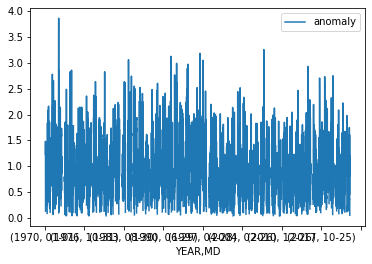

In [20]:
# 9
# group by "YEAR", "MD" to get a multi-indexed dataframe contains the counts
groupByYearMD = selectedBasinYear.groupby(["YEAR", "MD"]).size()
# get years
YEARIndex = groupByYearMD.index.levels[0]
# creat a pandas series to store anomoly value
anomaly = pd.Series()
# write the anomoly series with multi-date-MD-index and values
for YEAR in YEARIndex:
    temp = ((groupByYearMD.loc[YEAR]) / dailyCountAve).reset_index()
    temp['YEAR'] = str(YEAR)
    anomaly = pd.concat([anomaly, temp])
anomaly = anomaly.set_index(['YEAR', 'MD'])
# rename the value column to 'anomaly'
anomaly.rename(columns={0: 'anomaly'}, inplace=True)
# plot the anomaly time series
anomaly.plot()
plt.show()

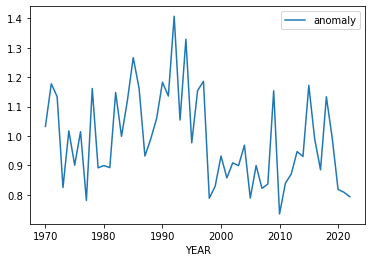

In [21]:
# 10
# get the annual average of anomaly
annualAnomaly = anomaly.groupby('YEAR').mean()
# plot the annual anomaly
annualAnomaly.plot()
plt.show()